## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors=5, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self._X = X
        self._y = y
        self._labels = np.arange(np.unique(self._y).shape[0])
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X)
    
    def get_neighbors(self, X):
        if self.algorithm == 'brute':
            distances = cdist(X, self._X, self.metric)
            return self._y[np.argpartition(distances, self.n_neighbors)[:, :self.n_neighbors]]
        if self.algorithm == 'kd_tree':
            _, neighbors = self.tree.query(X, k=self.n_neighbors)
            return self._y[neighbors]
        else:
            raise ValueError(f'There is no {self.algorithm} algorithm')
    
    def predict(self, X):
        neighbors_labels = self.get_neighbors(X)
        return np.array([np.argmax(np.bincount(i)) for i in neighbors_labels])

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 1.31 ms, sys: 179 µs, total: 1.49 ms
Wall time: 1.24 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 254 µs, sys: 35 µs, total: 289 µs
Wall time: 198 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 13.3 ms, sys: 4.22 ms, total: 17.5 ms
Wall time: 4.92 ms


array([0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 1.36 ms, sys: 173 µs, total: 1.53 ms
Wall time: 1.08 ms


array([0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 1.88 ms, sys: 241 µs, total: 2.12 ms
Wall time: 1.67 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 863 µs, sys: 112 µs, total: 975 µs
Wall time: 746 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 6.23 ms, sys: 0 ns, total: 6.23 ms
Wall time: 4.25 ms


array([1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 2.21 ms, sys: 288 µs, total: 2.5 ms
Wall time: 1.71 ms


array([1, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer(min_df=0.01, max_df=0.95)
X = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [24]:
def split(n, k):
    indexes = np.arange(n)
    np.random.shuffle(indexes)
    step = n // k
    for i in range(k):
        test_indexes = indexes[i*step:min(n, (i + 1) * step)]
        train_indexes = np.setdiff1d(indexes, test_indexes)
        yield train_indexes, test_indexes

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [25]:
import seaborn as sns

In [26]:
sns.set_style("darkgrid")

In [27]:
def cv_for_range_of_n_neighbors(model_class, algorithm, metric, max_n, X, y, epochs=3):
    result = np.zeros(max_n)
    for i in range(max_n):
        current_results = np.array([])
        for train_indxes, test_indexes in split(X.shape[0], epochs):
            x_train, x_test = X[train_indxes], X[test_indexes]
            y_train, y_test = y[train_indxes], y[test_indexes]
            model = model_class(n_neighbors=i+1, algorithm=algorithm, metric=metric)
            model.fit(x_train, y_train)
            labels = model.predict(x_test)
            current_results = np.append(current_results, accuracy_score(labels, y_test))
        result[i] = np.mean(current_results)
    print("Best number of neighbors and accuracy: ", np.argmax(result) + 1, np.max(result))
    return result

Best number of neighbors and accuracy:  20 0.1852735790683285


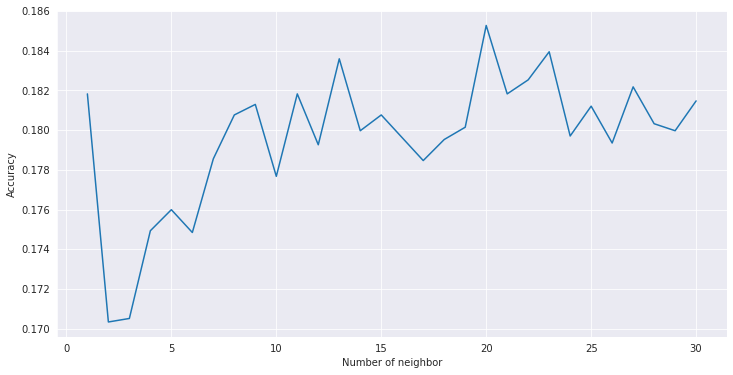

In [28]:
plt.figure(figsize=(12,6))
x = np.arange(1, 31)
y_euclidean_count_vec = cv_for_range_of_n_neighbors(KNeighborsClassifier, 'brute', 'euclidean', 30, X, target)
plt.plot(x, y_euclidean_count_vec)
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbor")
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

### cosine + count vectorizer

Best number of neighbors and accuracy:  1 0.25351365685494565


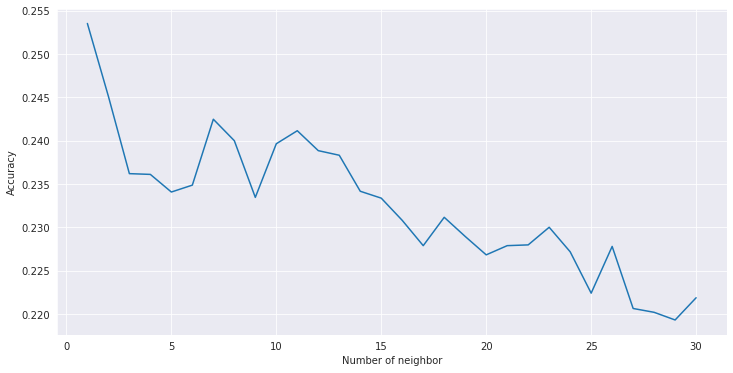

In [29]:
plt.figure(figsize=(12,6))
x = np.arange(1, 31)
y_cosine_count_vec = cv_for_range_of_n_neighbors(KNeighborsClassifier, 'brute', 'cosine', 30, X, target)
plt.plot(x, y_cosine_count_vec)
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbor")
plt.show()

Преобразуем данные теперь с помощью TFIDF

In [30]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95)
X = vectorizer.fit_transform(data).toarray()

### euclidean + TFIDF

Best number of neighbors and accuracy:  1 0.23238751878370015


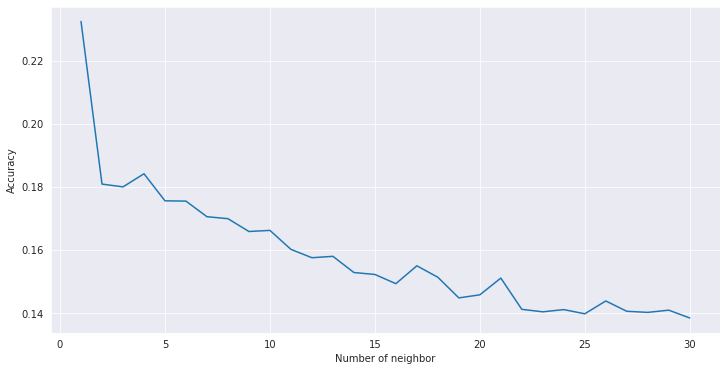

In [32]:
plt.figure(figsize=(12,6))
x = np.arange(1, 31)
y_euclidean_tdidf = cv_for_range_of_n_neighbors(KNeighborsClassifier, 'brute', 'euclidean', 30, X, target)
plt.plot(x, y_euclidean_tdidf)
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbor")
plt.show()

### cosine + TFIDF

Best number of neighbors and accuracy:  12 0.42429063908777515


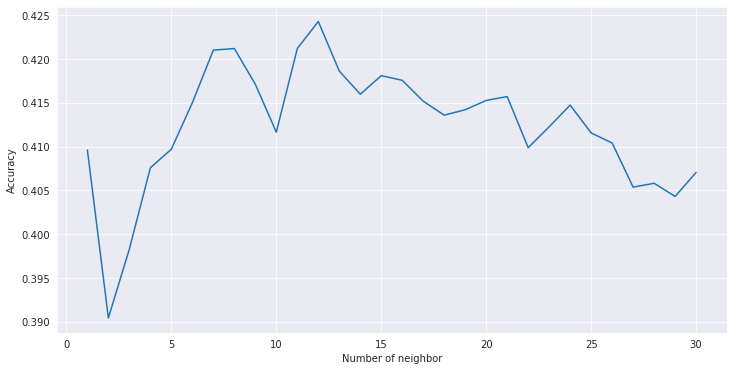

In [33]:
plt.figure(figsize=(12,6))
x = np.arange(1, 31)
y_cosine_tdidf = cv_for_range_of_n_neighbors(KNeighborsClassifier, 'brute', 'cosine', 30, X, target)
plt.plot(x, y_cosine_tdidf)
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbor")
plt.show()

### А теперь на одном графике

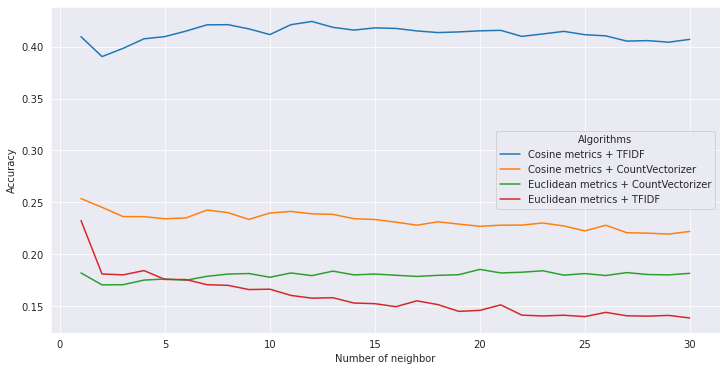

In [45]:
plt.figure(figsize=(12,6))
plt.plot(x, y_cosine_tdidf, label='Cosine metrics + TFIDF')
plt.plot(x, y_cosine_count_vec, label='Cosine metrics + CountVectorizer')
plt.plot(x, y_euclidean_count_vec, label='Euclidean metrics + CountVectorizer')
plt.plot(x, y_euclidean_tdidf, label='Euclidean metrics + TFIDF')
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbor")
plt.legend(title="Algorithms")
plt.show()

### Лучшая модель - cosine + TFIDF, n_neighbors=12
Что весьма логично, так как cosine метрика хороша при работе с текстами, а TFIDF извлекает больше информации чем CountVectorizer

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [35]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [36]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [37]:
best_model = MyKNeighborsClassifier(n_neighbors=12, algorithm='brute', metric='cosine')

In [38]:
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95)
X = vectorizer.fit_transform(data).toarray()

In [39]:
X_test = vectorizer.transform(data_test).toarray()

In [40]:
best_model.fit(X, target)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [41]:
preds = best_model.predict(X_test)

In [42]:
print(accuracy_score(preds, target_test))

0.38011152416356875


#### Выводы
Итак, качество упало. Это можно обосновать тем, что как минимум в тестовой части присутствуют слова, которых нет в обучающей выборке и наоборот. Поэтому мы не используем часть информации из тестов, а часть не вносит вклад, так как отсутствует в тестовой. Все это точно влияет на точность предсказаний. Более того, гиперпараметр (количество соседей) мы оптимизировали по показателям валидации, поэтому так или иначе "подогнались" под обучающую выборку